In [ ]:
#Tasks for INFO70041_Assignment 2:
#Class label is the dependent variable or the response variable.
#2=benign, 4=malignant

#Download the data and import it successfully to a pandas DataFrame
#Create a histogram of the size and shape of the Unif-Cell
#Create a Joint plot using Seaborn
#Investigate and invalid or missing (NaN) data and deal with it
#Split the data into train and test sets
#Create a Logistic Regression classifier and train it using your Training data set
#Make predictions using test data and generate confusion matrix of your results
#Generate the confusion matrix and compare the accuracy with the result of previous step

url = 'https://raw.githubusercontent.com/fahad101/Datasets/master/Wisconsin_Diagnostic_Breast_Cancer.csv'

# import dependencies
# data cleaning and manipulation 
import pandas as pd
import numpy as np
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# machine learning
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as skl_lm
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.formula.api as smf

# initialize some package settings
sns.set(style="whitegrid", color_codes=True, font_scale=1.3)

%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True) # Numpy prints Real numbers instead of Scientifical Notation

#Import data into a pandas DataFrame as .csv file
BreastCancerdata = pd.read_csv(url)

BreastCancerdata

,ID,Clum_thick,Unif_cell_size,Unif_cell_shape,Marg_adhesion,single_epich,Bare_nuc,Bland_chrom,Norm_nucl,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
BreastCancerdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Clum_thick       699 non-null    int64  
 1   Unif_cell_size   699 non-null    int64  
 2   Unif_cell_shape  699 non-null    int64  
 3   Marg_adhesion    699 non-null    int64  
 4   single_epich     699 non-null    int64  
 5   Bare_nuc         699 non-null    float64
 6   Bland_chrom      699 non-null    int64  
 7   Norm_nucl        699 non-null    int64  
 8   Mitoses          699 non-null    int64  
 9   Class            699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [ ]:
BreastCancerdata.head()

,ID,Clum_thick,Unif_cell_size,Unif_cell_shape,Marg_adhesion,single_epich,Bare_nuc,Bland_chrom,Norm_nucl,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
#BreastCancerdata.to_csv(r'C:\Users\Fahad\Downloads\breastcancer.csv')

# Investigate and invalid or missing (NaN) data and deal with it

In [ ]:
#There are no null values as in NA values in the Breast Cancer data
#However, there could be other types of values which are String values
#but not NA values
print(BreastCancerdata.isnull().sum())

ID                 0
Clum_thick         0
Unif_cell_size     0
Unif_cell_shape    0
Marg_adhesion      0
single_epich       0
Bare_nuc           0
Bland_chrom        0
Norm_nucl          0
Mitoses            0
Class              0
dtype: int64


In [ ]:
BreastCancerdata.info()
BreastCancerdata.applymap(np.isreal).all()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Clum_thick       699 non-null    int64  
 1   Unif_cell_size   699 non-null    int64  
 2   Unif_cell_shape  699 non-null    int64  
 3   Marg_adhesion    699 non-null    int64  
 4   single_epich     699 non-null    int64  
 5   Bare_nuc         699 non-null    float64
 6   Bland_chrom      699 non-null    int64  
 7   Norm_nucl        699 non-null    int64  
 8   Mitoses          699 non-null    int64  
 9   Class            699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


Clum_thick         True
Unif_cell_size     True
Unif_cell_shape    True
Marg_adhesion      True
single_epich       True
Bare_nuc           True
Bland_chrom        True
Norm_nucl          True
Mitoses            True
Class              True
dtype: bool

In [ ]:
#Making a list of missing value types
#Reload the dataset
missing_values = ["n/a","na","--", "?"]
BreastCancerdata = pd.read_csv(url, na_values = missing_values)

In [ ]:
#16 missing values in column "Bare_nuc" that are string values
print(BreastCancerdata.isnull().sum())

ID                  0
Clum_thick          0
Unif_cell_size      0
Unif_cell_shape     0
Marg_adhesion       0
single_epich        0
Bare_nuc           16
Bland_chrom         0
Norm_nucl           0
Mitoses             0
Class               0
dtype: int64


In [ ]:
BreastCancerdata['Bare_nuc'].mean()

3.5446559297218156

In [ ]:
#df.to_csv(r'dfwithquestionmarks.csv')

In [ ]:
#Replace missing values with the mean of the column, in this case mean of Bare_nucl
mean = BreastCancerdata['Bare_nuc'].mean()
BreastCancerdata['Bare_nuc'].fillna(mean, inplace=True)

In [ ]:
#There is no types of missing values for any of the variables
print(BreastCancerdata.isnull().sum())

ID                 0
Clum_thick         0
Unif_cell_size     0
Unif_cell_shape    0
Marg_adhesion      0
single_epich       0
Bare_nuc           0
Bland_chrom        0
Norm_nucl          0
Mitoses            0
Class              0
dtype: int64


In [ ]:
BreastCancerdata

,ID,Clum_thick,Unif_cell_size,Unif_cell_shape,Marg_adhesion,single_epich,Bare_nuc,Bland_chrom,Norm_nucl,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


# A histogram of the size and shape of the Unif-Cell


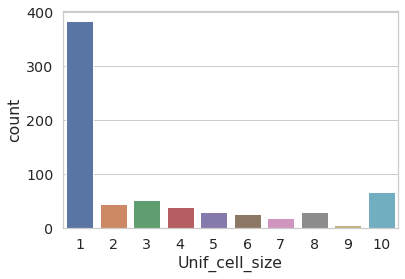

In [ ]:

sns.countplot(BreastCancerdata['Unif_cell_size'])


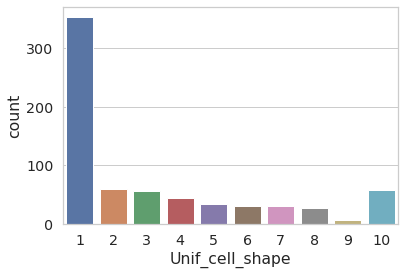

In [ ]:
sns.countplot(BreastCancerdata['Unif_cell_shape'])

# Create a Joint plot using Seaborn

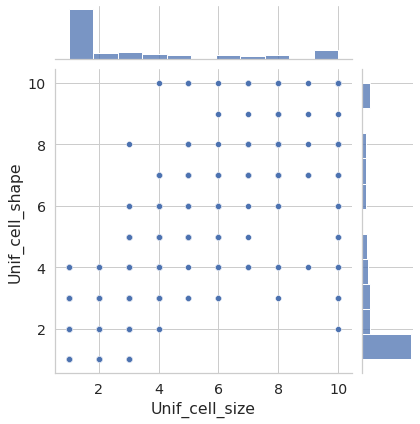

In [ ]:
p = sns.jointplot(data=BreastCancerdata,x='Unif_cell_size', y='Unif_cell_shape')

In [ ]:
#BreastCancerdata['Bare_nuc'] = pd.numeric(BreastCancerdata['Bare_nuc'], erros = 'coerce')
#sb.heatmap(BreastCancerdata.isnull(), yticktables = False, cbar = False, cmpa = 'virdis')

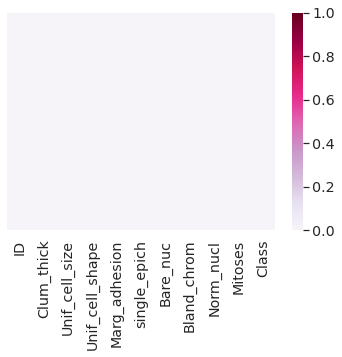

In [ ]:
# simple heat map showing where we are missing data
heat_map = sns.heatmap(BreastCancerdata.isnull(), yticklabels = False, cbar = True, cmap = "PuRd", vmin = 0, vmax = 1)
plt.show()

In [ ]:
#Drop of ID column from BreastCancer data as don't need it
#BreastCancerdata = BreastCancerdata.drop('ID', axis = 1)
#Dropping off columns ID and 'Bare_nuc'
#'Barenuc' has missing values, replace with mean
BreastCancerdata = BreastCancerdata.drop(['ID'], axis = 1)

In [ ]:
BreastCancerdata.describe().round()

,Clum_thick,Unif_cell_size,Unif_cell_shape,Marg_adhesion,single_epich,Bare_nuc,Bland_chrom,Norm_nucl,Mitoses,Class
count,699.0,699.0,699.0,699.0,699.0,699.0,699.0,699.0,699.0,699.0
mean,4.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,2.0,3.0
std,3.0,3.0,3.0,3.0,2.0,4.0,2.0,3.0,2.0,1.0
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
25%,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0
50%,4.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
75%,6.0,5.0,5.0,4.0,4.0,5.0,5.0,4.0,1.0,4.0
max,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,4.0


Benign       458
Malignant    241
Name: Presence_Cancer, dtype: int64


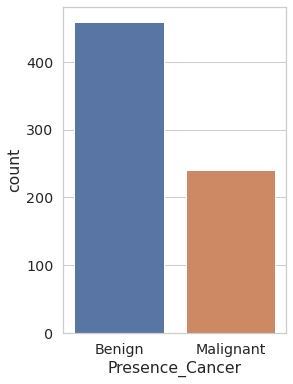

In [ ]:
# visualize distribution of classes 
plt.figure(figsize=(4,6))
tempRecord = pd.DataFrame()
tempRecord['Presence_Cancer'] = BreastCancerdata.Class.replace({2: 'Benign', 4 : 'Malignant'})
print(tempRecord.Presence_Cancer.value_counts())
sns.countplot(x='Presence_Cancer', data = tempRecord)

#sns.countplot(BreastCancerdata['Class'], palette='RdBu')

                 Clum_thick  Unif_cell_size  ...   Mitoses     Class
Clum_thick         1.000000        0.644913  ...  0.350034  0.716001
Unif_cell_size     0.644913        1.000000  ...  0.458693  0.817904
Unif_cell_shape    0.654589        0.906882  ...  0.438911  0.818934
Marg_adhesion      0.486356        0.705582  ...  0.417633  0.696800
single_epich       0.521816        0.751799  ...  0.479101  0.682785
Bare_nuc           0.587300        0.686801  ...  0.338740  0.816050
Bland_chrom        0.558428        0.755721  ...  0.344169  0.756616
Norm_nucl          0.535835        0.722865  ...  0.428336  0.712244
Mitoses            0.350034        0.458693  ...  1.000000  0.423170
Class              0.716001        0.817904  ...  0.423170  1.000000

[10 rows x 10 columns]


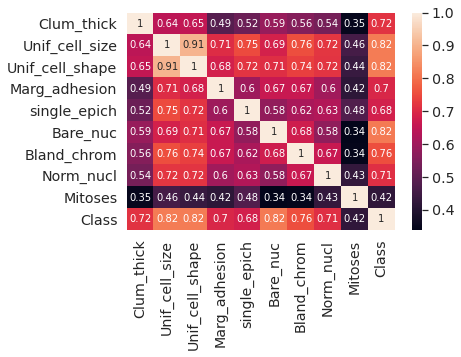

In [ ]:
# Unif_cell size is highly correlated with Unif_cell shape; so take one
#Don't want multicollinearlity, independent variables are indepedent of each other
#We will need to choose to drop of either Unif_cell size or Unif_cell_shape
#I choose later to drop of Unif_cell_size as the correlation between cell shape and class is higher
#than that of Unif_cell_shape to Class
print(BreastCancerdata.corr(method='pearson'))
sns.heatmap(BreastCancerdata.corr(method = 'pearson'), annot = True)

In [ ]:
#Number of observations
BreastCancerdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Clum_thick       699 non-null    int64  
 1   Unif_cell_size   699 non-null    int64  
 2   Unif_cell_shape  699 non-null    int64  
 3   Marg_adhesion    699 non-null    int64  
 4   single_epich     699 non-null    int64  
 5   Bare_nuc         699 non-null    float64
 6   Bland_chrom      699 non-null    int64  
 7   Norm_nucl        699 non-null    int64  
 8   Mitoses          699 non-null    int64  
 9   Class            699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


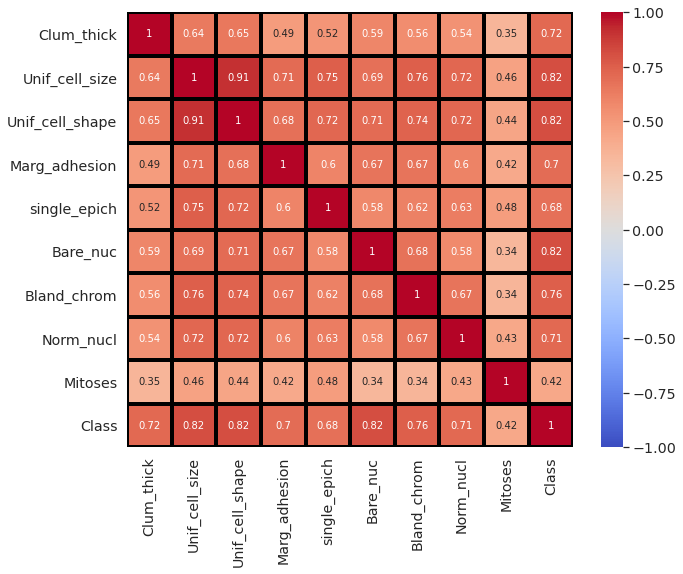

In [ ]:
#Plot of heatmaps of the correlations between different features
#Note strong negative correlation between X1 = Crime rate and X7 = % of people 25 years+ with at least 4 years of college
plt.subplots(figsize=(10,8))
corr = BreastCancerdata.corr()
sns.heatmap(corr,  annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',linewidths=3, linecolor='black')
plt.show()

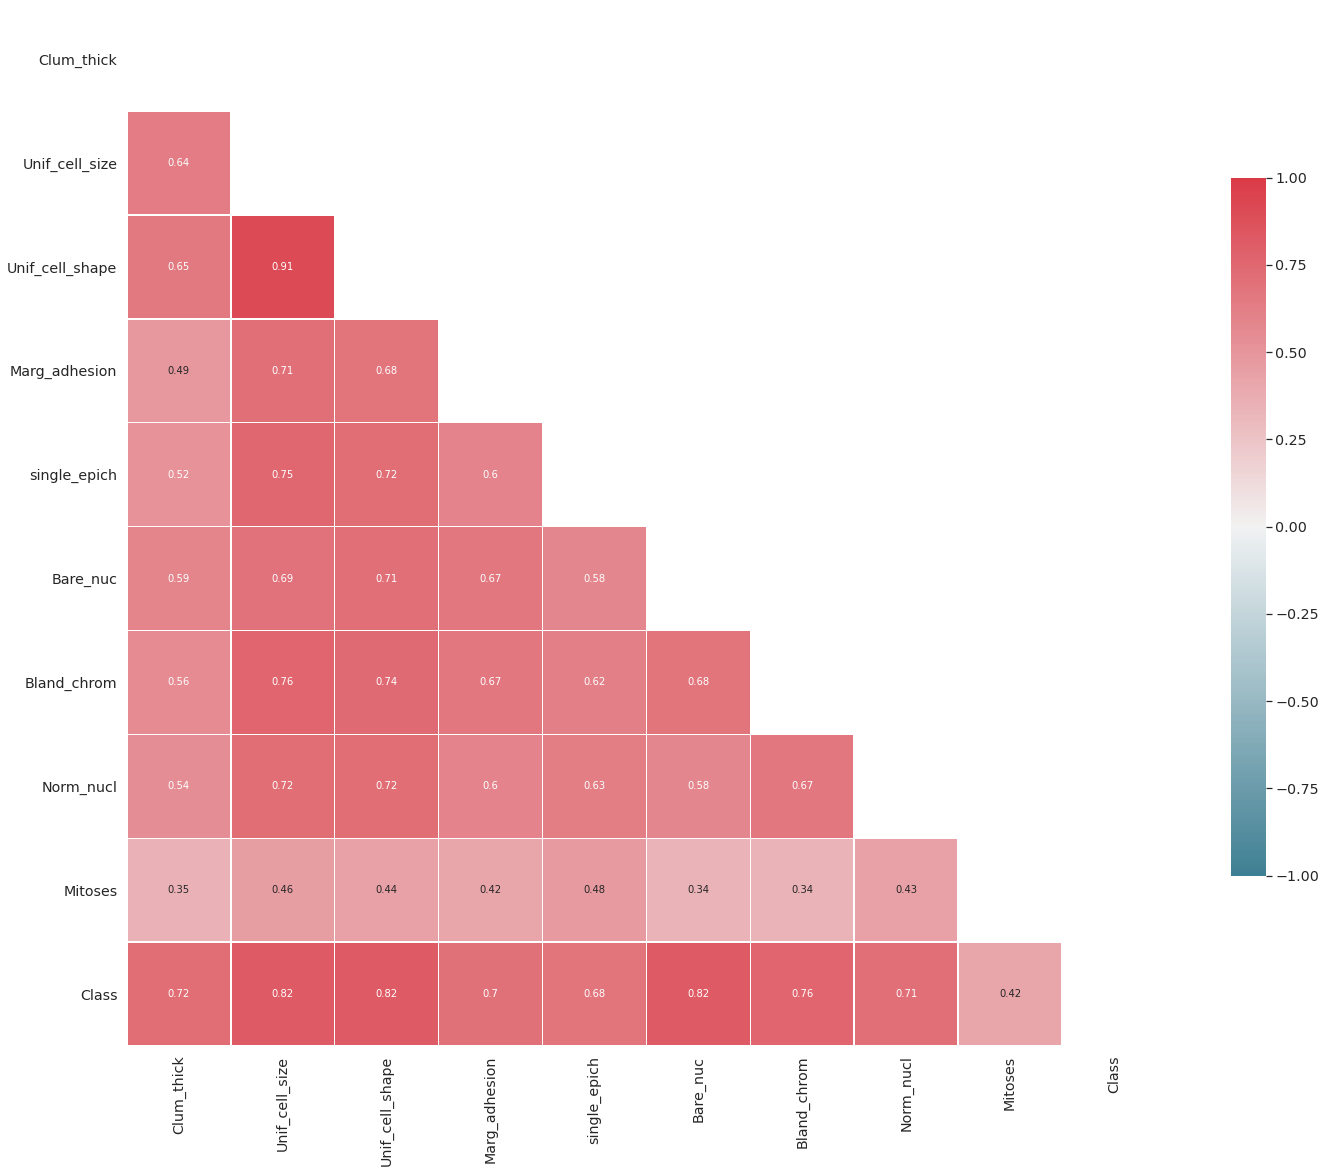

In [ ]:
# Draw the heatmap again, with the new correlation matrix
corr = BreastCancerdata.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

In [ ]:
# Divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables)
# Split the data into training and testing sets; 70% into training set and 30% into test set
##I choose drop of from the dataset, Unif_cell_size as the correlation between cell shape and class is higher
#than that of Unif_cell_shape to Class
X = BreastCancerdata.drop(['Class', 'Unif_cell_size'], axis = 1)
y = BreastCancerdata['Class']

X.head(n=5)


,Clum_thick,Unif_cell_shape,Marg_adhesion,single_epich,Bare_nuc,Bland_chrom,Norm_nucl,Mitoses
0,5,1,1,2,1.0,3,1,1
1,5,4,5,7,10.0,3,2,1
2,3,1,1,2,2.0,3,1,1
3,6,8,1,3,4.0,3,7,1
4,4,1,3,2,1.0,3,1,1


In [ ]:
# Run a standard logistic regression model to see how variables predict "Class"
# All independent variables show high significance, suggesting our training set
# will likely yield an accurate model
formula = 'BreastCancerdata.Class ~ ' + ' + '.join(X)
print(formula, '\n')
model = smf.glm(formula=formula, data=X, family=sm.families.Binomial())
logistic_fit = model.fit()

print(logistic_fit.summary())

BreastCancerdata.Class ~ Clum_thick + Unif_cell_shape + Marg_adhesion + single_epich + Bare_nuc + Bland_chrom + Norm_nucl + Mitoses 

                   Generalized Linear Model Regression Results                    
Dep. Variable:     BreastCancerdata.Class   No. Observations:                  699
Model:                                GLM   Df Residuals:                      690
Model Family:                    Binomial   Df Model:                            8
Link Function:                      logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                    nan
Date:                    Thu, 29 Oct 2020   Deviance:                       89078.
Time:                            23:02:11   Pearson chi2:                 1.18e+19
No. Iterations:                         2                                         
Covariance Type:                nonrobust                                         
                      coef    std er

# Split the data into train and test sets

In [ ]:
#Split the dataset into training and test set, 30% for training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [ ]:
BreastCancerdata.Class

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: Class, Length: 699, dtype: int64

In [ ]:
# Run the model and report the results
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
BreastCancerdata

,Clum_thick,Unif_cell_size,Unif_cell_shape,Marg_adhesion,single_epich,Bland_chrom,Norm_nucl,Mitoses,Class
0,5,1,1,1,2,3,1,1,2
1,5,4,4,5,7,3,2,1,2
2,3,1,1,1,2,3,1,1,2
3,6,8,8,1,3,3,7,1,2
4,4,1,1,3,2,3,1,1,2
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,1,1,1,2
695,2,1,1,1,2,1,1,1,2
696,5,10,10,3,7,8,10,2,4
697,4,8,6,4,3,10,6,1,4


# Make predictions using test data and generate confusion matrix of your results

In [ ]:
Prediction = logit.predict(X_test)

In [ ]:
Prediction

array([2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4,
       2, 4, 4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2,
       4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4,
       4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4,
       2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 4, 2, 4, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4,
       4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4,
       4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 4,
       2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4])

In [ ]:
#To compare actual with observed
df = pd.DataFrame({'Actual':y_test, 'Predicted':Prediction})
df

,Actual,Predicted
535,2,2
494,2,4
361,4,4
265,2,2
369,2,2
...,...,...
54,4,4
499,2,2
313,2,2
116,2,2


# Confusion matrix and compare the accuracy with result of previous step

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy: {}". format(accuracy_score(y_test, Prediction)))

Accuracy: 0.9428571428571428


In [ ]:
print(classification_report(y_test, Prediction))

              precision    recall  f1-score   support

           2       0.96      0.96      0.96       141
           4       0.91      0.91      0.91        69

    accuracy                           0.94       210
   macro avg       0.94      0.94      0.94       210
weighted avg       0.94      0.94      0.94       210



In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, Prediction)
print(cm)

[[135   6]
 [  6  63]]


Text(26.5, 0.5, 'Predicted Labels')

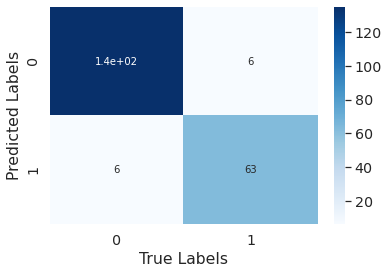

In [ ]:
sns.heatmap(cm, cmap='Blues', annot=True)
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")